# 지하철 시간대별 데이터 시각화하기

* 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?
* 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은 어디일까?

대중교통 데이터를 바탕으로 질문에 답해보자.

In [1]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/13.데이터분석

In [2]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 1. 지하철 시간대별 이용 현황 데이터 정제하기
---


아래처럼 데이터를 정제하세요

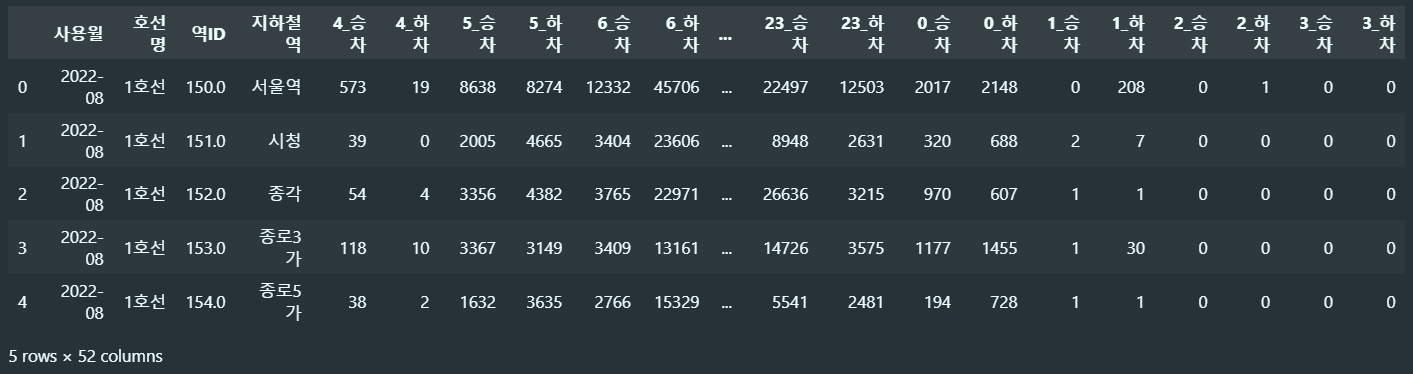

In [3]:

import pandas as pd

In [4]:
df = pd.read_csv('./data/subwaytime.csv',encoding='cp949',thousands=',') #콤마 적용 되지 않음....
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2023-06,1호선,150.0,서울역,677,33,"8,470","9,569","13,528","54,052",...,"14,949","2,554","2,856",0,229,0,0,0,0,2023-07-03 08:56:54
2,2023-06,1호선,151.0,시청,61,1,"2,351","4,528","3,862","24,513",...,"4,535",334,"1,075",0,36,1,0,0,0,2023-07-03 08:56:54
3,2023-06,1호선,152.0,종각,95,4,"4,145","5,411","4,357","28,581",...,"4,703","1,202",870,0,0,0,0,0,0,2023-07-03 08:56:54
4,2023-06,1호선,153.0,종로3가,259,8,"4,585","3,292","3,959","13,393",...,"5,448","1,601","2,109",1,21,0,0,0,0,2023-07-03 08:56:54


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   사용월                614 non-null    object 
 1   호선명                614 non-null    object 
 2   역ID                614 non-null    float64
 3   지하철역               614 non-null    object 
 4   04:00:00~04:59:59  615 non-null    object 
 5   Unnamed: 5         615 non-null    object 
 6   05:00:00~05:59:59  615 non-null    object 
 7   Unnamed: 7         615 non-null    object 
 8   06:00:00~06:59:59  615 non-null    object 
 9   Unnamed: 9         615 non-null    object 
 10  07:00:00~07:59:59  615 non-null    object 
 11  Unnamed: 11        615 non-null    object 
 12  08:00:00~08:59:59  615 non-null    object 
 13  Unnamed: 13        615 non-null    object 
 14  09:00:00~09:59:59  615 non-null    object 
 15  Unnamed: 15        615 non-null    object 
 16  10:00:00~10:59:59  615 non

In [6]:
df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51', '작업일시'],
      dtyp

In [7]:
new_cols = ['사용월','호선명','역ID','지하철역']

for i in range(4,24):
    new_cols.append(f'{i}_승차')
    new_cols.append(f'{i}_하차')

for i in range(0,4):
    new_cols.append(f'{i}_승차')
    new_cols.append(f'{i}_하차')

new_cols

['사용월',
 '호선명',
 '역ID',
 '지하철역',
 '4_승차',
 '4_하차',
 '5_승차',
 '5_하차',
 '6_승차',
 '6_하차',
 '7_승차',
 '7_하차',
 '8_승차',
 '8_하차',
 '9_승차',
 '9_하차',
 '10_승차',
 '10_하차',
 '11_승차',
 '11_하차',
 '12_승차',
 '12_하차',
 '13_승차',
 '13_하차',
 '14_승차',
 '14_하차',
 '15_승차',
 '15_하차',
 '16_승차',
 '16_하차',
 '17_승차',
 '17_하차',
 '18_승차',
 '18_하차',
 '19_승차',
 '19_하차',
 '20_승차',
 '20_하차',
 '21_승차',
 '21_하차',
 '22_승차',
 '22_하차',
 '23_승차',
 '23_하차',
 '0_승차',
 '0_하차',
 '1_승차',
 '1_하차',
 '2_승차',
 '2_하차',
 '3_승차',
 '3_하차']

In [8]:
len(new_cols)

52

In [9]:
df.shape # 작업일시 포함 -> 작업일시 제외하고 데이터프레임 만들기로 함..

(615, 53)

In [10]:
df.head(3)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2023-06,1호선,150.0,서울역,677,33,"8,470","9,569","13,528","54,052",...,"14,949","2,554","2,856",0,229,0,0,0,0,2023-07-03 08:56:54
2,2023-06,1호선,151.0,시청,61,1,"2,351","4,528","3,862","24,513",...,"4,535",334,"1,075",0,36,1,0,0,0,2023-07-03 08:56:54


In [11]:
value = df.iloc[1:, :-1].values # 작업일시 제외하고 데이터만 추출

In [12]:
# 새로운 데이터 프레임 만들기

new_df = pd.DataFrame(data=value , columns=new_cols)
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2023-06,1호선,150.0,서울역,677,33,"8,470","9,569","13,528","54,052",...,"26,064","14,949","2,554","2,856",0,229,0,0,0,0
1,2023-06,1호선,151.0,시청,61,1,"2,351","4,528","3,862","24,513",...,"10,547","4,535",334,"1,075",0,36,1,0,0,0
2,2023-06,1호선,152.0,종각,95,4,"4,145","5,411","4,357","28,581",...,"28,697","4,703","1,202",870,0,0,0,0,0,0
3,2023-06,1호선,153.0,종로3가,259,8,"4,585","3,292","3,959","13,393",...,"19,488","5,448","1,601","2,109",1,21,0,0,0,0
4,2023-06,1호선,154.0,종로5가,74,1,"2,016","3,879","3,261","16,721",...,"6,735","3,739",286,980,0,0,0,0,0,0


In [13]:
new_df.to_csv('./data/subwaytime_pre.csv',index=False)

## 2. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까
---
출근시간:아침 7,8,9시

In [14]:
new_df = pd.read_csv('./data/subwaytime_pre.csv',thousands=',')
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2023-06,1호선,150.0,서울역,677,33,8470,9569,13528,54052,...,26064,14949,2554,2856,0,229,0,0,0,0
1,2023-06,1호선,151.0,시청,61,1,2351,4528,3862,24513,...,10547,4535,334,1075,0,36,1,0,0,0
2,2023-06,1호선,152.0,종각,95,4,4145,5411,4357,28581,...,28697,4703,1202,870,0,0,0,0,0,0
3,2023-06,1호선,153.0,종로3가,259,8,4585,3292,3959,13393,...,19488,5448,1601,2109,1,21,0,0,0,0
4,2023-06,1호선,154.0,종로5가,74,1,2016,3879,3261,16721,...,6735,3739,286,980,0,0,0,0,0,0


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     614 non-null    object 
 1   호선명     614 non-null    object 
 2   역ID     614 non-null    float64
 3   지하철역    614 non-null    object 
 4   4_승차    614 non-null    int64  
 5   4_하차    614 non-null    int64  
 6   5_승차    614 non-null    int64  
 7   5_하차    614 non-null    int64  
 8   6_승차    614 non-null    int64  
 9   6_하차    614 non-null    int64  
 10  7_승차    614 non-null    int64  
 11  7_하차    614 non-null    int64  
 12  8_승차    614 non-null    int64  
 13  8_하차    614 non-null    int64  
 14  9_승차    614 non-null    int64  
 15  9_하차    614 non-null    int64  
 16  10_승차   614 non-null    int64  
 17  10_하차   614 non-null    int64  
 18  11_승차   614 non-null    int64  
 19  11_하차   614 non-null    int64  
 20  12_승차   614 non-null    int64  
 21  12_하차   614 non-null    int64  
 22  13


## 1. 출근시간 대 가장 많이 승차하는 역은?

```
아래와 같은 형식으로 출력
출근 시간대 사람들이 가장 많이 타는 역은?  홍대 : 32347
```

In [16]:

new_df['출근시간대_승차합계'] =  new_df['7_승차'] + new_df['8_승차'] + new_df['9_승차']
new_df.head(3)



,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계
0,2023-06,1호선,150.0,서울역,677,33,8470,9569,13528,54052,...,14949,2554,2856,0,229,0,0,0,0,178483
1,2023-06,1호선,151.0,시청,61,1,2351,4528,3862,24513,...,4535,334,1075,0,36,1,0,0,0,30998
2,2023-06,1호선,152.0,종각,95,4,4145,5411,4357,28581,...,4703,1202,870,0,0,0,0,0,0,30813


In [17]:


top_df = new_df.sort_values(by=['출근시간대_승차합계'],ascending=False)

In [18]:
top_df.head(3)

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계
39,2023-06,2호선,230.0,신림,252,9,39966,4245,73232,18357,...,78228,4756,24011,6,564,0,0,0,0,634022
41,2023-06,2호선,232.0,구로디지털단지,366,42,40051,5453,54887,20596,...,51343,3676,15052,7,492,0,0,0,0,448222
37,2023-06,2호선,228.0,서울대입구(관악구청),4861,15,28765,2779,45826,15433,...,51493,4145,20148,0,3205,0,0,0,0,424378


In [19]:
top_df.iloc[0,3] ,top_df.iloc[0,-1]

('신림', 634022)

In [20]:
len(top_df)

614

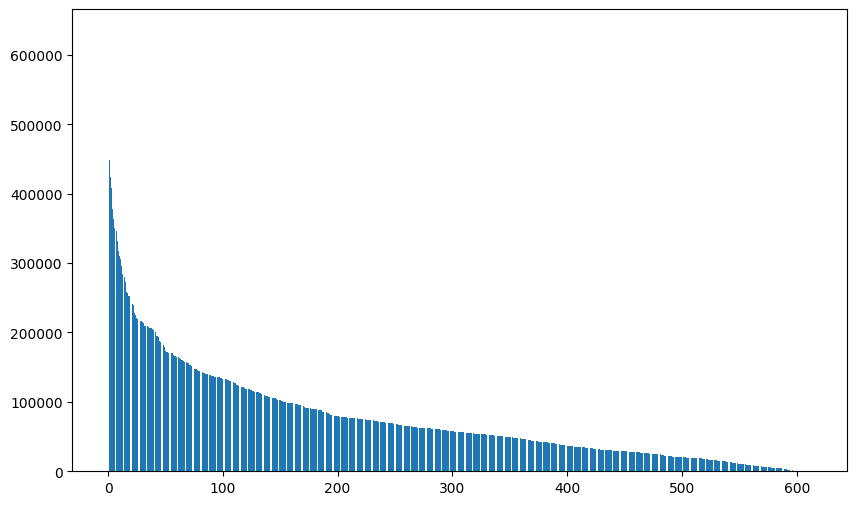

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(range(len(top_df)),top_df['출근시간대_승차합계'])
plt.show()

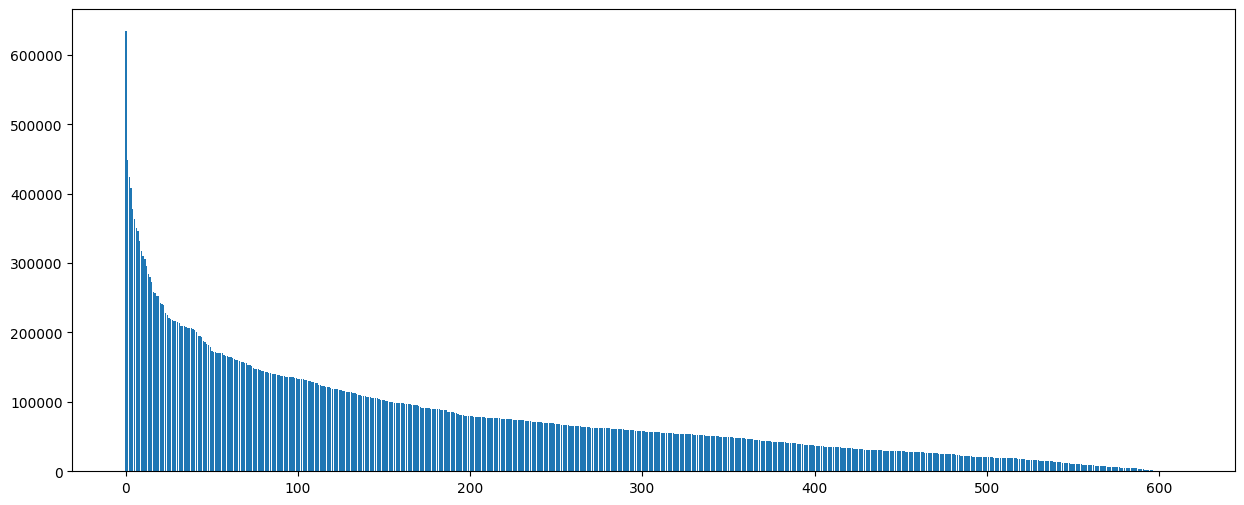

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.bar(range(len(top_df)),top_df['출근시간대_승차합계'])
plt.show()

In [23]:
top_df['출근시간대_승차합계'].describe()

count       614.000000
mean      76099.421824
std       73258.382461
min           0.000000
25%       27390.250000
50%       56502.000000
75%       99731.750000
max      634022.000000
Name: 출근시간대_승차합계, dtype: float64

```
화면 비율에 따라 데이터가 표시가 되고, 안되고가 발생한다.
이것은 데이터 시각화에서 주의해야할 부분으로
통계 데이터와 함께 검증을 통해서 보완 방향을 결정해야 한다. 
```

## 2. 출근 시간대에 사람들이 가장 많이 내리는 역은?

In [28]:
import pandas as pd

new_df = pd.read_csv('./data/subwaytime_pre.csv',thousands=',')
new_df.head()


,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2023-06,1호선,150.0,서울역,677,33,8470,9569,13528,54052,...,26064,14949,2554,2856,0,229,0,0,0,0
1,2023-06,1호선,151.0,시청,61,1,2351,4528,3862,24513,...,10547,4535,334,1075,0,36,1,0,0,0
2,2023-06,1호선,152.0,종각,95,4,4145,5411,4357,28581,...,28697,4703,1202,870,0,0,0,0,0,0
3,2023-06,1호선,153.0,종로3가,259,8,4585,3292,3959,13393,...,19488,5448,1601,2109,1,21,0,0,0,0
4,2023-06,1호선,154.0,종로5가,74,1,2016,3879,3261,16721,...,6735,3739,286,980,0,0,0,0,0,0


In [29]:
new_df['출근시간대_하차합계'] = new_df['7_하차'] + new_df['8_하차'] + new_df['9_하차']

In [32]:
new_df = new_df.sort_values(by=['출근시간대_하차합계'],ascending=False)
# new_df.head()

name = new_df.iloc[0,3]
count = new_df.iloc[0,-1]

print(f'출근 시간대 사람들이 가장 많이 내리는 역은? {name} :{count} 명')


출근 시간대 사람들이 가장 많이 내리는 역은? 역삼 :817239 명


## 3. 밤 11시에 사람들이 가장 많이 타는 역은 어디일까

In [33]:
import pandas as pd

new_df = pd.read_csv('./data/subwaytime_pre.csv',thousands=',')
df_23 = new_df.sort_values(by=['23_승차'],ascending=False)
df_23.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
48,2023-06,2호선,239.0,홍대입구,1096,19,30919,3733,32348,18545,...,98489,54853,13413,18986,3,2178,0,0,0,0
31,2023-06,2호선,222.0,강남,156,9,8947,11414,18370,53723,...,80699,26257,14863,7004,1,40,0,0,0,0
21,2023-06,2호선,212.0,건대입구,394,13,17541,1814,22600,15731,...,47176,33762,8390,11782,7,888,0,0,0,0
49,2023-06,2호선,240.0,신촌,80,5,8276,2947,15242,16031,...,43441,25121,6836,7408,3,195,0,0,0,0
35,2023-06,2호선,226.0,사당,62,4,12748,4655,28962,36271,...,36194,42028,6255,12183,10,848,0,0,0,0


## 4. 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까
---


In [60]:
import pandas as pd

new_df = pd.read_csv('./data/subwaytime_pre.csv',thousands=',')

# new_df.sort_values(by=['23_승차'],ascending=False).head(1)[['지하철역','23_승차']]

name_lst = []
count_lst = []

for i in range(0,24):
    colstr = f'{i}_승차'
    # print(colstr)
    on_df = new_df.sort_values(by=[colstr],ascending=False)
    name = on_df['지하철역'].values[0]
    
    name = f'{name}({i})' 
    count = on_df[colstr].values[0]

    name_lst.append(name)
    count_lst.append(count)

    print(f'{i}시: {name} - {count}')

0시: 강남(0) - 14863
1시: 개화(1) - 15
2시: 아현(2) - 2
3시: 서울역(3) - 0
4시: 구로(4) - 13085
5시: 부천(5) - 41222
6시: 신림(6) - 73232
7시: 신림(7) - 191986
8시: 신림(8) - 275438
9시: 신림(9) - 166598
10시: 신림(10) - 92710
11시: 잠실(송파구청)(11) - 81424
12시: 잠실(송파구청)(12) - 90817
13시: 강남(13) - 98986
14시: 강남(14) - 111314
15시: 강남(15) - 136410
16시: 강남(16) - 163591
17시: 강남(17) - 248094
18시: 삼성(무역센터)(18) - 321404
19시: 강남(19) - 204839
20시: 강남(20) - 160682
21시: 홍대입구(21) - 185479
22시: 홍대입구(22) - 185665
23시: 홍대입구(23) - 98489


In [61]:
len(name_lst),len(count_lst)

(24, 24)

시간대별로 사람들이 가장 많이 승차하는 그래프를 그려보자.

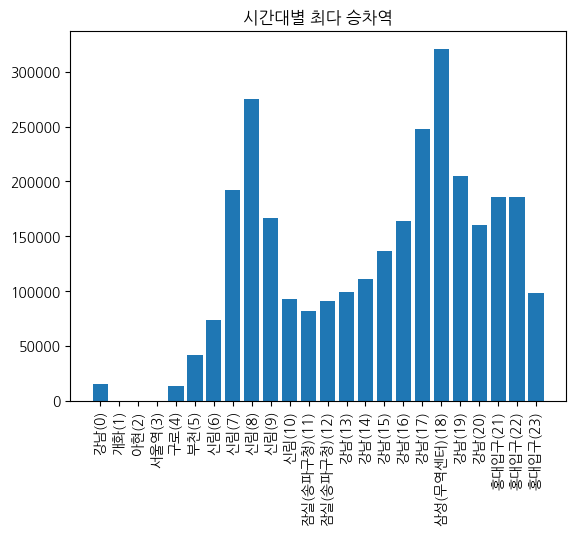

In [63]:
import matplotlib.pyplot as plt
plt.rc('font', family ='NanumGothic')

## 어떤 차트를  사용해야 할까?

plt.bar(range(24),height=count_lst)
plt.xticks(range(24),name_lst,rotation=90)
plt.title('시간대별 최다 승차역')
plt.show()


시간대별로 사람들이 가장 많이 하차하는 그래프를 그려보자.

In [64]:
import pandas as pd

new_df = pd.read_csv('./data/subwaytime_pre.csv',thousands=',')

# new_df.sort_values(by=['23_승차'],ascending=False).head(1)[['지하철역','23_승차']]

name_lst = []
count_lst = []

for i in range(0,24):
    colstr = f'{i}_하차'
    # print(colstr)
    on_df = new_df.sort_values(by=[colstr],ascending=False)
    name = on_df['지하철역'].values[0]
    
    name = f'{name}({i})' 
    count = on_df[colstr].values[0]

    name_lst.append(name)
    count_lst.append(count)

    print(f'{i}시: {name} - {count}')

0시: 신림(0) - 24011
1시: 서울대입구(관악구청)(1) - 3205
2시: 개화(2) - 2
3시: 서울역(3) - 0
4시: 영등포(4) - 110
5시: 강남(5) - 11414
6시: 서울역(6) - 54052
7시: 강남(7) - 154867
8시: 가산디지털단지(8) - 377228
9시: 역삼(9) - 305717
10시: 강남(10) - 150402
11시: 홍대입구(11) - 120617
12시: 홍대입구(12) - 139701
13시: 홍대입구(13) - 154162
14시: 홍대입구(14) - 146363
15시: 홍대입구(15) - 146816
16시: 홍대입구(16) - 158189
17시: 홍대입구(17) - 188316
18시: 잠실(송파구청)(18) - 233482
19시: 신림(19) - 198806
20시: 신림(20) - 125681
21시: 신림(21) - 120575
22시: 신림(22) - 116858
23시: 신림(23) - 78228


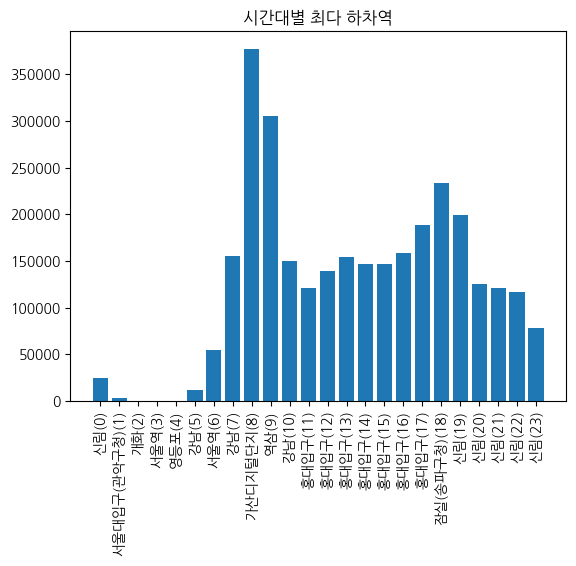

In [65]:
import matplotlib.pyplot as plt
plt.rc('font', family ='NanumGothic')

## 어떤 차트를  사용해야 할까?

plt.bar(range(24),height=count_lst)
plt.xticks(range(24),name_lst,rotation=90)
plt.title('시간대별 최다 하차역')
plt.show()


## 5. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면
---
__만약 모든 지하철역의 시간대별 승하차 인원을 더하면 어떤 결과를 확인할 수 있을까?__

이 질문을 해결하기 위한 알고리즘은 다음과 같이 간단히 생각할 수 있다.

1. 데이터를 읽어온다.
2. 모든 역에 대해 시간대별 승차 인원과 하차 인원을 누적해서 더한다.
3. 시간대별 승차 인원과 하차 인원을 그래프로 표현한다.

In [ ]:
import pandas as pd

new_df = pd.read_csv('./data/subwaytime_pre.csv')
new_df.head()

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.rc('font', family = 'NanumGothic') 
plt.title('지하철 시간대별 승하차 인원 추이') # 제목 추가

plt.show()